In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
from keras.optimizers import SGD
#%matplotlib notebook

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from numpy.linalg import inv
from numpy import linalg as LA
from scipy import linalg
import random

from matplotlib import animation, rc
from IPython.display import HTML

Using TensorFlow backend.


In [2]:
i=0
df_D = pd.read_csv('C:/Users/endrep/Documents/training_batches/D' + str(i+1) + '.csv')
df_F = pd.read_csv('C:/Users/endrep/Documents/training_batches/F' + str(i+1) + '.csv')

In [3]:
F=[]
d = 10
for i in range(d):
    if i == 0:
        F = df_F.shift(d-i).values
        
    else:
        F = np.concatenate((F, df_F.shift(d-i).values), axis=1)


In [4]:
F = F[d:,:]

D = df_D.values
D = D[d:,:]

dim = np.shape(D)

In [5]:
x = np.linspace(0,1, dim[1])

In [6]:
#Normalizing
scaler = MinMaxScaler()
Fscaled = scaler.fit_transform(F)
Dscaled = scaler.fit_transform(D)

In [7]:
X_train = Fscaled
Y_train = Dscaled

#Train test split
train_portion = 0.8
n_timesteps = len(X_train[:,0])
x_train = X_train[0:int(n_timesteps*train_portion),:]
x_test = X_train[int(n_timesteps*(train_portion)):,:]
y_train = Y_train[0:int(n_timesteps*train_portion),:]
y_test = Y_train[int(n_timesteps*(train_portion)):,:]

n_features = int(x_train.shape[1]/d)
n_nodes = len(y_train[0,:])

In [8]:
x_train = x_train.reshape((x_train.shape[0], d, n_features))
x_test = x_test.reshape((x_test.shape[0], d, n_features))

In [9]:
def get_error(predictions, y_test):
    #Total error
    error = 0
    for i in range(len(predictions[:,0])):
        #for j in range(d):
        error += np.trapz((y_test[i,:] - predictions[i,:])**2, x)
        #error += K.mean(K.square(predictions - y_test), axis=-1)
    
    return error

In [10]:
#Define model
model = Sequential()
model.add(LSTM(100, input_shape=(x_train.shape[1], x_train.shape[2]),))
model.add(Dense(len(y_train[0,:])))
model.compile(loss='mae', optimizer='adam')
model.fit(x_train, y_train, epochs=200, batch_size=len(x_train), verbose=1, shuffle=False)

Epoch 1/200
3992/3992 [==============================] - 1s 299us/step - loss: 0.4911
Epoch 2/200
3992/3992 [==============================] - 1s 200us/step - loss: 0.4568
Epoch 3/200
3992/3992 [==============================] - 1s 161us/step - loss: 0.4282
Epoch 4/200
3992/3992 [==============================] - 1s 158us/step - loss: 0.4032
Epoch 5/200
3992/3992 [==============================] - 1s 162us/step - loss: 0.3819
Epoch 6/200
3992/3992 [==============================] - 1s 163us/step - loss: 0.3639
Epoch 7/200
3992/3992 [==============================] - 1s 163us/step - loss: 0.3482
Epoch 8/200
3992/3992 [==============================] - 1s 162us/step - loss: 0.3369
Epoch 9/200
3992/3992 [==============================] - 1s 163us/step - loss: 0.3292
Epoch 10/200
3992/3992 [==============================] - 1s 163us/step - loss: 0.3252
Epoch 11/200
3992/3992 [==============================] - 1s 170us/step - loss: 0.3236
Epoch 12/200
3992/3992 [============================

Epoch 96/200
3992/3992 [==============================] - 1s 178us/step - loss: 0.2750
Epoch 97/200
3992/3992 [==============================] - 1s 175us/step - loss: 0.2750
Epoch 98/200
3992/3992 [==============================] - 1s 173us/step - loss: 0.2750
Epoch 99/200
3992/3992 [==============================] - 1s 172us/step - loss: 0.2750
Epoch 100/200
3992/3992 [==============================] - 1s 178us/step - loss: 0.2750
Epoch 101/200
3992/3992 [==============================] - 1s 171us/step - loss: 0.2750
Epoch 102/200
3992/3992 [==============================] - 1s 172us/step - loss: 0.2750
Epoch 103/200
3992/3992 [==============================] - 1s 175us/step - loss: 0.2750
Epoch 104/200
3992/3992 [==============================] - 1s 174us/step - loss: 0.2750
Epoch 105/200
3992/3992 [==============================] - 1s 174us/step - loss: 0.2749
Epoch 106/200
3992/3992 [==============================] - 1s 171us/step - loss: 0.2749
Epoch 107/200
3992/3992 [===========

3992/3992 [==============================] - 1s 168us/step - loss: 0.2731
Epoch 190/200
3992/3992 [==============================] - 1s 171us/step - loss: 0.2730
Epoch 191/200
3992/3992 [==============================] - 1s 173us/step - loss: 0.2729
Epoch 192/200
3992/3992 [==============================] - 1s 169us/step - loss: 0.2728
Epoch 193/200
3992/3992 [==============================] - 1s 171us/step - loss: 0.2727
Epoch 194/200
3992/3992 [==============================] - 1s 173us/step - loss: 0.2726
Epoch 195/200
3992/3992 [==============================] - 1s 170us/step - loss: 0.2724
Epoch 196/200
3992/3992 [==============================] - 1s 171us/step - loss: 0.2723
Epoch 197/200
3992/3992 [==============================] - 1s 169us/step - loss: 0.2721
Epoch 198/200
3992/3992 [==============================] - 1s 166us/step - loss: 0.2720
Epoch 199/200
3992/3992 [==============================] - 1s 171us/step - loss: 0.2718
Epoch 200/200
3992/3992 [=====================

In [244]:
'''
#Stateful model
print('Build STATEFUL model...')
model = Sequential()
model.add(LSTM(10, batch_input_shape=(1, 1, 1), return_sequences=False, stateful=True))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
'''

"\n#Stateful model\nprint('Build STATEFUL model...')\nmodel = Sequential()\nmodel.add(LSTM(10, batch_input_shape=(1, 1, 1), return_sequences=False, stateful=True))\nmodel.add(Dense(1, activation='sigmoid'))\nmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])\n"

In [270]:
#x_train.shape

In [273]:
'''
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1],1))
print(x_train.shape)
print(y_train.shape)
'''

'\nx_train = x_train.reshape((x_train.shape[0], x_train.shape[1],1))\nx_test = x_test.reshape((x_test.shape[0], x_test.shape[1],1))\nprint(x_train.shape)\nprint(y_train.shape)\n'

In [272]:
'''
print('Train stateful...')
for epoch in range(15):
    mean_tr_acc = []
    mean_tr_loss = []
    for i in range(len(x_train)):
        y_true = y_train[i]
        for j in range(len(x_train[0,:])):
            tr_loss, tr_acc = model.train_on_batch(np.expand_dims(np.expand_dims(X_train[i][j], axis=1), axis=1),
                                                   np.array([y_true]))
            mean_tr_acc.append(tr_acc)
            mean_tr_loss.append(tr_loss)
        model.reset_states()

    print('accuracy training = {}'.format(np.mean(mean_tr_acc)))
    print('loss training = {}'.format(np.mean(mean_tr_loss)))
    print('___________________________________')
'''

"\nprint('Train stateful...')\nfor epoch in range(15):\n    mean_tr_acc = []\n    mean_tr_loss = []\n    for i in range(len(x_train)):\n        y_true = y_train[i]\n        for j in range(len(x_train[0,:])):\n            tr_loss, tr_acc = model.train_on_batch(np.expand_dims(np.expand_dims(X_train[i][j], axis=1), axis=1),\n                                                   np.array([y_true]))\n            mean_tr_acc.append(tr_acc)\n            mean_tr_loss.append(tr_loss)\n        model.reset_states()\n\n    print('accuracy training = {}'.format(np.mean(mean_tr_acc)))\n    print('loss training = {}'.format(np.mean(mean_tr_loss)))\n    print('___________________________________')\n"

In [11]:
preds = scaler.inverse_transform(model.predict(x_test))
#y_test_u = scaler.inverse_transform(y_test)

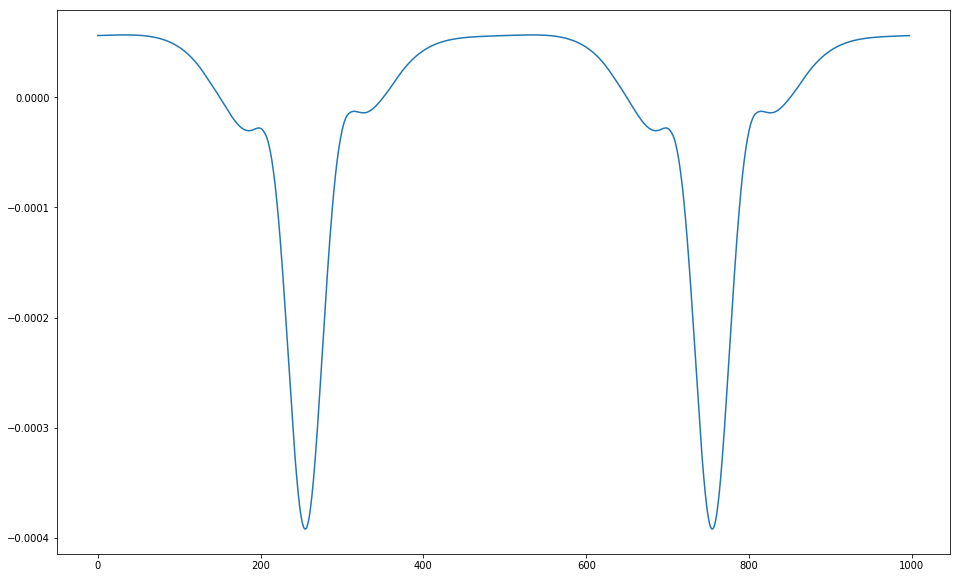

In [12]:
plt.figure(figsize=(16,10))
plt.plot(preds[:,-1])
#lt.plot(y_test_u[:,-1])
plt.show()

In [303]:
print(get_error(y_test_u, preds))

1.72535622635e-06


In [304]:
predictions = scaler.inverse_transform(model.predict(x_train))
y_train_u = scaler.inverse_transform(y_train)

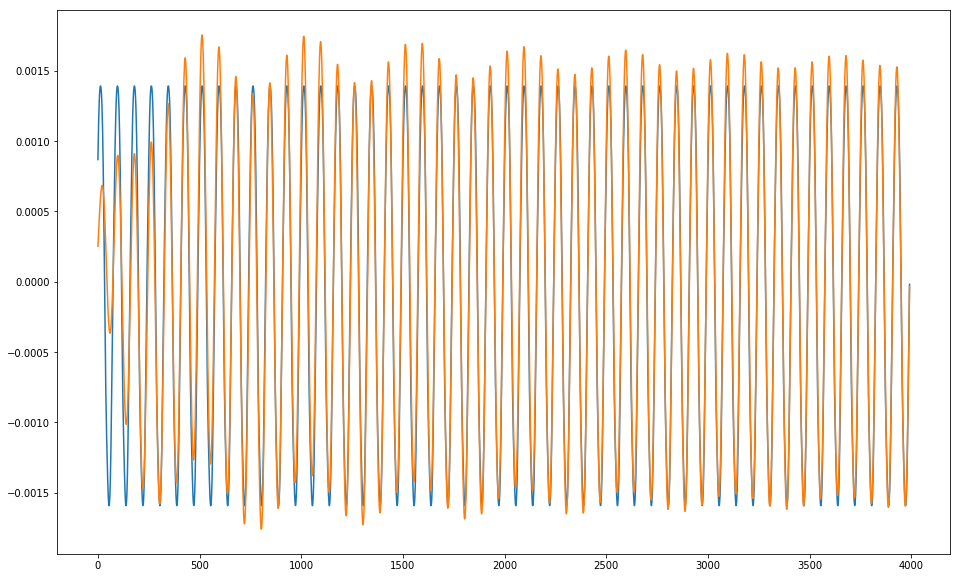

In [305]:
plt.figure(figsize=(16,10))
plt.plot(predictions[:,-1], '-')
plt.plot(y_train_u[:, -1])
plt.show()

In [306]:
print(get_error(y_train_u, predictions))

4.07389326154e-05


In [313]:
F = np.zeros([dim[0], n_features])

for i in range(dim[0]):
    F[i,:] = np.sin(2*np.pi*i/100)*np.ones(n_features)
    
df_F = pd.DataFrame(F)

In [269]:
#Export results
np.savetxt("predictions.csv", predictions, delimiter=",")
np.savetxt("preds.csv", preds, delimiter=",")
np.savetxt("y_test.csv", y_test_u, delimiter=",")
np.savetxt("y_train.csv", y_train_u, delimiter=",")